In [1]:
import sys
import pandas as pd
import numpy as np
from scipy.stats import uniform,randint
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode,mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/train.csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/test.csv")

In [0]:
train.shape

(54808, 14)

In [0]:
test.shape

(23490, 13)

In [0]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [0]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [0]:
d={'Analytics':0,'Finance':1,'HR':2, 'Legal':3, 'Operations':4, 'Procurement':5,
       'R&D':6, 'Sales & Marketing':7, 'Technology':8 }
train['department']=train['department'].map(d)
test['department']=test['department'].map(d)

d={'other':1, 'referred':2, 'sourcing':3}
train['recruitment_channel']=train['recruitment_channel'].map(d)
test['recruitment_channel']=test['recruitment_channel'].map(d)

d={'region_1':1, 'region_10':10, 'region_11':11, 'region_12':12, 'region_13':13,
       'region_14':14, 'region_15':15, 'region_16':16, 'region_17':17, 'region_18':18,
       'region_19':19, 'region_2':2, 'region_20':20, 'region_21':21, 'region_22':22,
       'region_23':23, 'region_24':24, 'region_25':25, 'region_26':26, 'region_27':27,
       'region_28':28, 'region_29':29, 'region_3':3, 'region_30':30, 'region_31':31,
       'region_32':32, 'region_33':33, 'region_34':34, 'region_4':4, 'region_5':5,
       'region_6':6, 'region_7':7, 'region_8':8, 'region_9':9}
train['region']=train['region'].map(d)  
test['region']=test['region'].map(d)  

d={'m':1,'f':0}
train['gender']=train['gender'].map(d) 
test['gender']=test['gender'].map(d)

d={"Master's & above":1, "Bachelor's":2, 'Below Secondary':3}
train['education']=train['education'].map(d)
test['education']=test['education'].map(d)



Smote

In [0]:
train.shape

(54808, 14)

In [0]:
train=train.dropna()
y=train['is_promoted']
train=train.drop('is_promoted',axis=1)
sm=SMOTE()
X,y=sm.fit_sample(train,y)

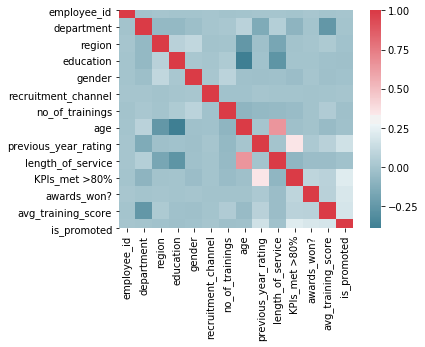

In [0]:
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

CASE 1:

In [0]:
df=train.drop(['education','previous_year_rating'],axis=1)
y=df['is_promoted']
df=df.drop(['is_promoted'],axis=1)

In [0]:
df_train,df_test,df_train_label,df_test_label=train_test_split(df,y,train_size=0.4)
rf_model=SVC()
rf_model.fit(df_train,df_train_label)
predict=rf_model.predict(df_test)
f1_score(predict,df_test_label)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


CASE 2:

In [0]:
test_data=train[train['education'].isnull()]
test_d=test_data.drop(['is_promoted','education','previous_year_rating'],axis=1)
train_d=train[np.isfinite(train['education'])]
y=train_d['education']
alpha1=train_d['previous_year_rating']
alpha2=train_d['is_promoted']
train_d=train_d.drop(['education','is_promoted','previous_year_rating'],axis=1)

x_train,x_test,x_train_label,x_test_label=train_test_split(train_d,y,train_size=0.7)

test_pre_data=test[test['education'].isnull()]
alpha3=test_pre_data['previous_year_rating']
test_pre_data=test_pre_data.drop(['education','previous_year_rating'],axis=1)
test_remaing=test[np.isfinite(test['education'])]



In [0]:
model = XGBClassifier()
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))
predict1=model.predict(test_d)
predict2=model.predict(test_pre_data)

0.7462468193384225


In [0]:
train_d['is_promoted']=alpha2
train_d['education']=y
train_d['previous_year_rating']=alpha1
test_data['education']=predict1
data1=pd.concat([train_d,test_data])

test_pre_data['previous_year_rating']=alpha3
test_pre_data['education']=predict2
data2=pd.concat([test_pre_data,test_remaing])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior

In [0]:
data2.shape

(23490, 13)

In [0]:
test_data=data1[data1['previous_year_rating'].isnull()]
test_d=test_data.drop(['previous_year_rating','is_promoted'],axis=1)
train_d=data1[np.isfinite(data1['previous_year_rating'])]
alpha1=train_d['is_promoted']
y=train_d['previous_year_rating']
train_d=train_d.drop(['previous_year_rating','is_promoted'],axis=1)

test_pre_data=data2[data2['previous_year_rating'].isnull()]
test_pre_data=test_pre_data.drop('previous_year_rating',axis=1)
test_remaing=data2[np.isfinite(data2['previous_year_rating'])]

x_train,x_test,x_train_label,x_test_label=train_test_split(train_d,y,train_size=0.7)

In [0]:
model=XGBClassifier()
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))

0.423780086807839


In [0]:
predict1=model.predict(test_d)
predict2=model.predict(test_pre_data)
test_data['previous_year_rating']=predict1
train_d['is_promoted']=alpha1
train_d['previous_year_rating']=y
data1=pd.concat([train_d,test_data])

test_pre_data['previous_year_rating']=predict2
data2=pd.concat([test_pre_data,test_remaing])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=

In [0]:
data1.shape

(54808, 14)

In [0]:
data2.shape

(23490, 13)

In [0]:
data1.isnull().sum()

KPIs_met >80%           0
age                     0
avg_training_score      0
awards_won?             0
department              0
education               0
employee_id             0
gender                  0
is_promoted             0
length_of_service       0
no_of_trainings         0
previous_year_rating    0
recruitment_channel     0
region                  0
dtype: int64

In [0]:
data2.isnull().sum()

KPIs_met >80%           0
age                     0
avg_training_score      0
awards_won?             0
department              0
education               0
employee_id             0
gender                  0
length_of_service       0
no_of_trainings         0
previous_year_rating    0
recruitment_channel     0
region                  0
dtype: int64

In [0]:
y=data1['is_promoted']

train=data1.drop('is_promoted',axis=1)
sm=SMOTE()
data1,y=sm.fit_sample(train,y) 

x_train,x_test,x_train_label,x_test_label=train_test_split(data1,y,train_size=0.7)


In [0]:
model = XGBClassifier(min_depth=5)
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))

0.956222576785002


In [0]:

model=LogisticRegression(solver='lbfgs',multi_class='multinomial')
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))

In [0]:
model=MLPClassifier(hidden_layer_sizes=(200,))
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))

0.914553305357903


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
prediction=model.predict(data2.values)

In [0]:
df=pd.DataFrame(prediction,data2['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

In [0]:
df

,is_promoted
employee_id,
42719,0
56772,0
65459,0
12723,0
18612,0
...,...
47537,0
53478,0
25600,0


CASE 3:

In [0]:
test_data=train[train['education'].isnull()]
test_d=test_data.drop(['is_promoted','education','previous_year_rating','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score'],axis=1)
train_d=train[np.isfinite(train['education'])]
y=train_d['education']
alpha1=train_d[['previous_year_rating','is_promoted','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score']]
train_d=train_d.drop(['education','is_promoted','previous_year_rating','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score'],axis=1)


test_pre_data=test[test['education'].isnull()]
alpha3=test_pre_data[['previous_year_rating','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score']]
test_pre_data=test_pre_data.drop(['education','previous_year_rating','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score'],axis=1)
test_remaing=test[np.isfinite(test['education'])]

In [0]:
x_train,x_test,x_train_label,x_test_label=train_test_split(train_d,y,train_size=0.7)

In [0]:
model = XGBClassifier()
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))
predict1=model.predict(test_d)
predict2=model.predict(test_pre_data)

In [0]:
test_data['education']=predict1
train_d['education']=y
train_d[['previous_year_rating','is_promoted','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score']]=alpha1
data1=pd.concat([test_data,train_d])

test_pre_data['education']=predict2
test_pre_data[['previous_year_rating','employee_id','department','region','gender','recruitment_channel','no_of_trainings','KPIs_met >80%','awards_won?','avg_training_score']]=alpha3
data2=pd.concat([test_pre_data,test_remaing])

In [0]:
test_data=data1[data1['previous_year_rating'].isnull()]
test_d=test_data.drop(['is_promoted','age','length_of_service','education','previous_year_rating','employee_id','region','gender','recruitment_channel','no_of_trainings','awards_won?','avg_training_score'],axis=1)
train_d=data1[np.isfinite(data1['previous_year_rating'])]
y=train_d['previous_year_rating']
alpha1=train_d[['is_promoted','employee_id','region','education','gender','recruitment_channel','no_of_trainings','awards_won?','avg_training_score','age','length_of_service']]
train_d=train_d.drop(['age','length_of_service','education','is_promoted','previous_year_rating','employee_id','region','gender','recruitment_channel','no_of_trainings','awards_won?','avg_training_score'],axis=1)


test_pre_data=data2[data2['previous_year_rating'].isnull()]
alpha3=test_pre_data[['employee_id','education','age','region','gender','recruitment_channel','no_of_trainings','length_of_service','awards_won?','avg_training_score']]
test_pre_data=test_pre_data.drop(['education','previous_year_rating','employee_id','age','region','gender','recruitment_channel','no_of_trainings','length_of_service','awards_won?','avg_training_score'],axis=1)
test_remaing=data2[np.isfinite(data2['previous_year_rating'])]

In [0]:
x_train,x_test,x_train_label,x_test_label=train_test_split(train_d,y,train_size=0.7)

In [0]:
model = XGBClassifier()
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))
predict1=model.predict(test_d)
predict2=model.predict(test_pre_data)

In [0]:
test_data['previous_year_rating']=predict1
train_d['previous_year_rating']=y
train_d[['is_promoted','employee_id','region','education','gender','recruitment_channel','no_of_trainings','awards_won?','avg_training_score','age','length_of_service']]=alpha1
data1=pd.concat([test_data,train_d])

test_pre_data[['employee_id','age','education','region','gender','recruitment_channel','no_of_trainings','length_of_service','awards_won?','avg_training_score']]=alpha3
test_pre_data['previous_year_rating']=predict2
data2=pd.concat([test_pre_data,test_remaing])

Case 4

In [0]:
train['education']=train['education'].fillna(mode(train['education']))
train['previous_year_rating']=train['previous_year_rating'].fillna(mode(train['previous_year_rating']))

In [0]:
test['education']=test['education'].fillna(mode(test['education']))
test['previous_year_rating']=test['previous_year_rating'].fillna(mode(test['previous_year_rating']))

In [0]:
y=train['is_promoted']
train=train.drop('is_promoted',axis=1)

x_train,x_test,x_train_label,x_test_label=train_test_split(train,y,train_size=0.7)

In [0]:
model = XGBClassifier(min_depth=5)
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))

0.9334671288694277


In [0]:
prediction=model.predict(test)

In [0]:
df=pd.DataFrame(prediction,test['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

using Smote

In [0]:
x_train,x_test,x_train_label,x_test_label=train_test_split(X,y,train_size=0.7)
model = XGBClassifier(min_depth=5)
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label,average='micro'))

prediction=model.predict(test.values)
df=pd.DataFrame(prediction,test['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

0.955096222380613


# Case 5: Model + Label encoder

In [0]:
test['education']=test['education'].fillna(mode(test['education']))
test['previous_year_rating']=test['previous_year_rating'].fillna(mode(test['previous_year_rating']))

In [0]:
train['education']=train['education'].fillna(mode(train['education']))
train['previous_year_rating']=train['previous_year_rating'].fillna(mode(train['previous_year_rating']))

In [0]:
train.shape

(54808, 14)

In [0]:
test.shape

(23490, 13)

In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
a1=train[['department','region','education','gender','recruitment_channel']]
a1=a1.apply(lambda x:l.fit_transform(x))
a2=test[['department','region','education','gender','recruitment_channel']]
a2=a2.apply(lambda x:l.fit_transform(x))

train[['department','region','education','gender','recruitment_channel']]=a1
test[['department','region','education','gender','recruitment_channel']]=a2

y=train['is_promoted']
train=train.drop('is_promoted',axis=1)

In [0]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [0]:
x_train,x_test,x_train_label,x_test_label=train_test_split(train,y,train_size=0.7)
xgb_model=XGBClassifier()
model = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 21.5min finished


0.5012919896640827


In [0]:
prediction=model.predict(test)
df=pd.DataFrame(prediction,test['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

In [0]:
df.iloc[8724]

is_promoted    0
Name: 7669, dtype: int64

## SMOTE

In [0]:
y=data1['is_promoted']
train=data1.drop('is_promoted',axis=1)
sm=SMOTE()
data1,y=sm.fit_sample(train,y)
x_train,x_test,x_train_label,x_test_label=train_test_split(data1,y,train_size=0.7)


In [0]:
for i in [3,4,5,6,7,8,9]:
  model = XGBClassifier(min_depth=i)
  model.fit(x_train,x_train_label)
  predict=model.predict(x_test)
  print(f1_score(predict,x_test_label))


In [0]:
prediction=model.predict(data2.values)
df=pd.DataFrame(prediction,data2['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

Without smote

In [0]:
y=data1['is_promoted']
data1=data1.drop('is_promoted',axis=1)
x_train,x_test,x_train_label,x_test_label=train_test_split(data1,y,train_size=0.7)

In [0]:
for i in [3,4,5,6,7,8,9]:
  model = XGBClassifier(min_depth=i)
  model.fit(x_traiy=data1['is_promoted']
data1=data1.drop('is_promoted',axis=1)
x_train,x_test,x_train_label,x_test_label=train_test_split(data1,y,train_size=0.7)n,x_train_label)
  predict=model.predict(x_test)
  print(f1_score(predict,x_test_label))

In [0]:
prediction=model.predict(data2.values)

In [0]:
df=pd.DataFrame(prediction,data2['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

Random

In [0]:
train['education']=train['education'].fillna(mode(train['education']))
train['previous_year_rating']=train['previous_year_rating'].fillna(mode(train['previous_year_rating']))

test['education']=test['education'].fillna(mode(test['education']))
test['previous_year_rating']=test['previous_year_rating'].fillna(mode(test['previous_year_rating']))

In [0]:
y=train['is_promoted']
train=train.drop('is_promoted',axis=1)

x_train,x_test,x_train_label,x_test_label=train_test_split(train,y,train_size=0.7)

In [0]:
for i in [3,4,5,6,7,8,9]:
  model = XGBClassifier(min_depth=3)
  model.fit(x_train,x_train_label)
  predict=model.predict(x_test)
  print(f1_score(predict,x_test_label))

In [0]:
prediction=model.predict(test)
df=pd.DataFrame(prediction,data2['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")

Grid search with Xgboost

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [0]:
test['education']=test['education'].fillna(mode(test['education']))
test['previous_year_rating']=test['previous_year_rating'].fillna(mode(test['previous_year_rating']))

train['education']=train['education'].fillna(mode(train['education']))
train['previous_year_rating']=train['previous_year_rating'].fillna(mode(train['previous_year_rating']))

test=test.drop('recruitment_channel',axis=1)
train=train.drop('recruitment_channel',axis=1)

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
a1=train[['department','region','education','gender']]
a1=a1.apply(lambda x:l.fit_transform(x))
a2=test[['department','region','education','gender']]
a2=a2.apply(lambda x:l.fit_transform(x))

train[['department','region','education','gender']]=a1
test[['department','region','education','gender']]=a2

y=train['is_promoted']
train=train.drop('is_promoted',axis=1)
x_train,x_test,x_train_label,x_test_label=train_test_split(train,y,train_size=0.7)

In [0]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
model = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,x_train_label), verbose=3, random_state=1001 )

In [0]:
model.fit(x_train,x_train_label)
predict=model.predict(x_test)
print(f1_score(predict,x_test_label))

In [0]:
prediction=model.predict(test)
df=pd.DataFrame(prediction,test['employee_id'],columns=['is_promoted'])
df.to_csv("/content/drive/My Drive/Colab Notebooks/hacathon_analytic_vidhya/result.csv")